# Import Library

In [ ]:
#library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Asassing Data

In [ ]:
data = pd.read_csv('Mall_Customers.csv')

# Explore and Visualize the data

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
print(f"jumlah data duplicate {data.duplicated().sum()}")

jumlah data duplicate 0


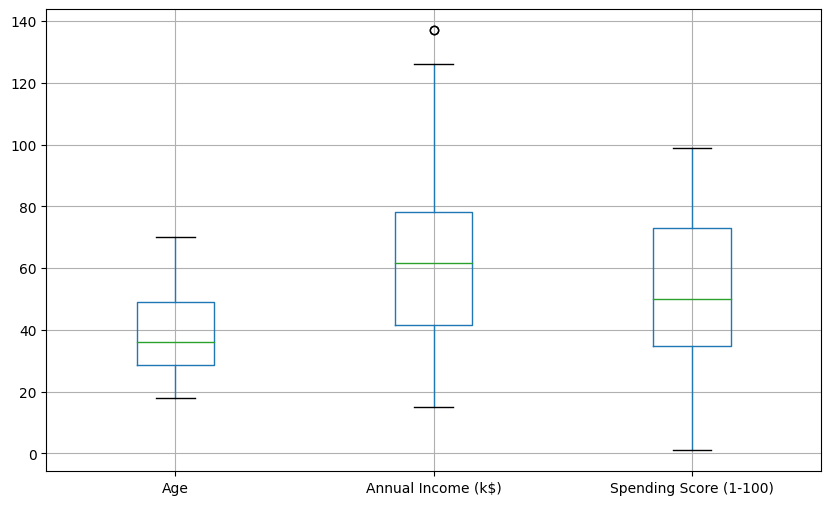

In [ ]:
#cek outliers
plt.figure(figsize=(10,6))
data.boxplot(column=['Age','Annual Income (k$)','Spending Score (1-100)'])
plt.show()

In [ ]:
q1 = data['Annual Income (k$)'].quantile(0.25)
q3 = data['Annual Income (k$)'].quantile(0.75)

iqr = q3-q1

In [ ]:
max = q3 + (iqr*1.5)
min = q1 - (iqr*1.5)

In [ ]:
data.drop(data[data['Annual Income (k$)'] < min].index, inplace=True)
data.drop(data[data['Annual Income (k$)'] > max].index, inplace=True)

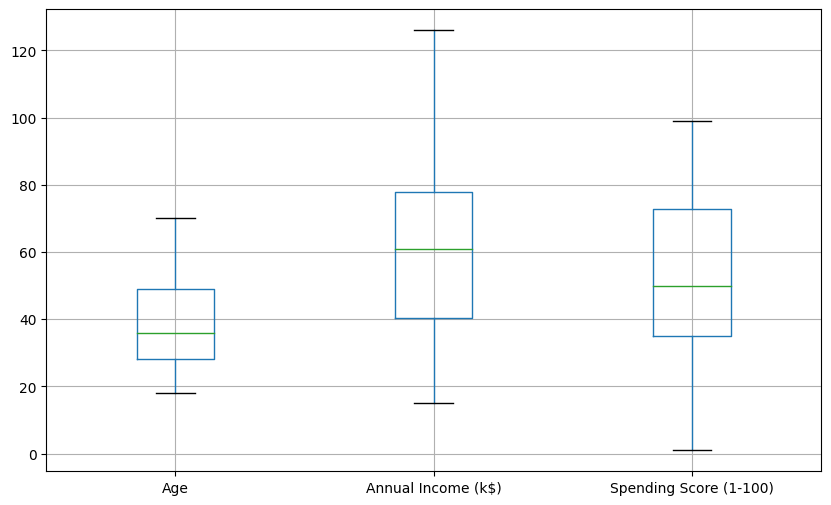

In [ ]:
#cek outliers
plt.figure(figsize=(10,6))
data.boxplot(column=['Age','Annual Income (k$)','Spending Score (1-100)'])
plt.show()

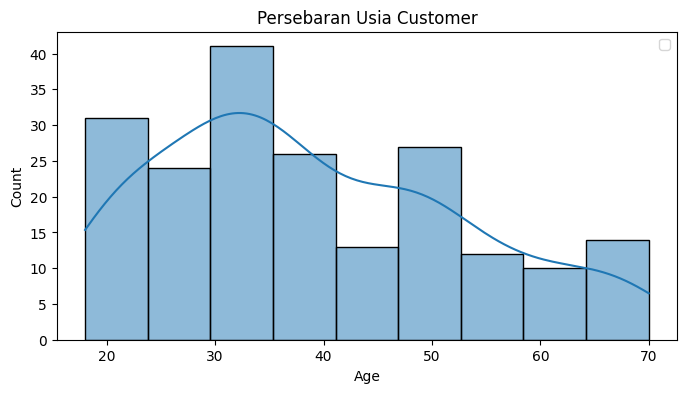

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(x=data['Age'], kde=True)
ax.set_title('Persebaran Usia Customer')
ax.legend()
fig.show();

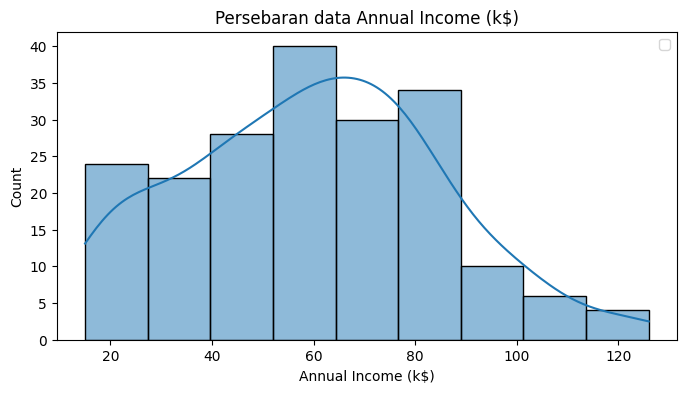

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(data =data, x=data['Annual Income (k$)'], ax=ax, kde=True)
ax.set_title('Persebaran data Annual Income (k$)')
ax.legend()
fig.show();

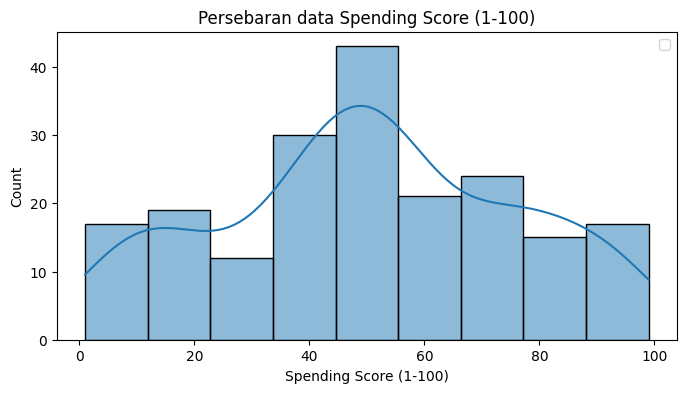

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(data =data, x=data['Spending Score (1-100)'], ax=ax, kde=True)
ax.set_title('Persebaran data Spending Score (1-100)')
ax.legend()
fig.show();

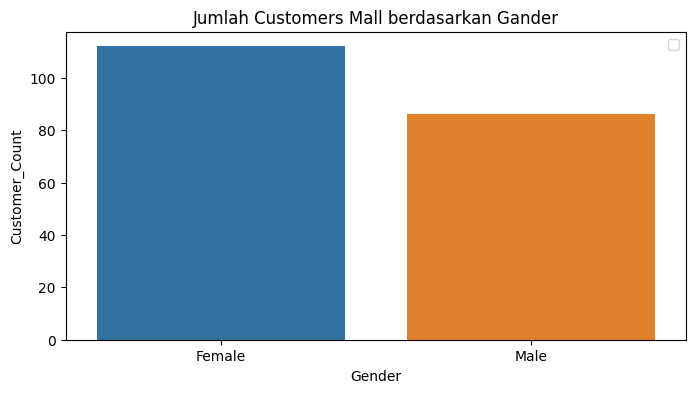

In [ ]:
bygender = data.groupby(by='Gender').CustomerID.nunique().reset_index()
bygender.rename(columns={'CustomerID':'Customer_Count'}, inplace=True)

fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data =bygender, x='Gender', y='Customer_Count', ax=ax)
ax.set_title('Jumlah Customers Mall berdasarkan Gander')
ax.legend()
fig.show();

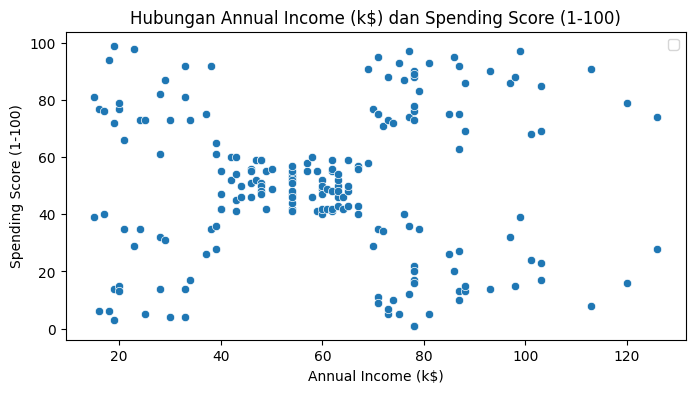

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.scatterplot(data =data, x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'])
ax.set_title('Hubungan Annual Income (k$) dan Spending Score (1-100)')
ax.legend()
fig.show();

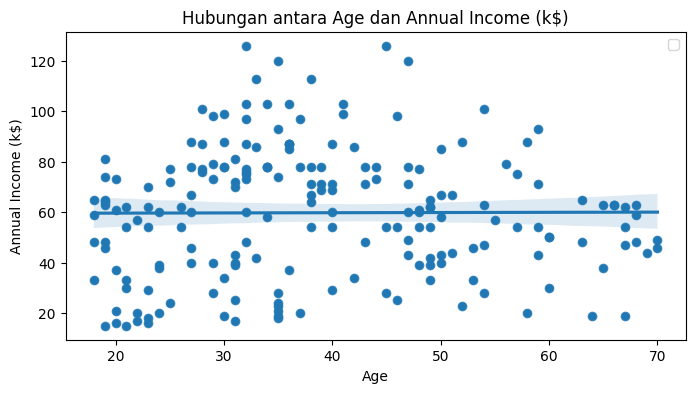

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.scatterplot(data =data, x=data['Age'], y=data['Annual Income (k$)'], ax=ax)
sns.regplot(data =data, x=data['Age'], y=data['Annual Income (k$)'])
ax.set_title('Hubungan antara Age dan Annual Income (k$)')
ax.legend()
fig.show();

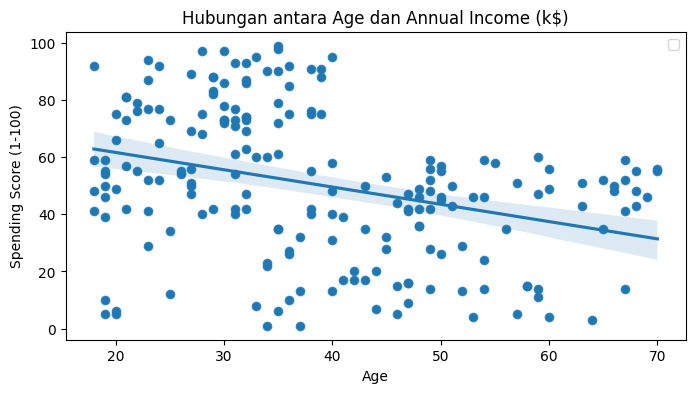

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.scatterplot(data =data, x=data['Age'], y=data['Spending Score (1-100)'], ax=ax)
sns.regplot(data =data, x=data['Age'], y=data['Spending Score (1-100)'])
ax.set_title('Hubungan antara Age dan Annual Income (k$)')
ax.legend()
fig.show();

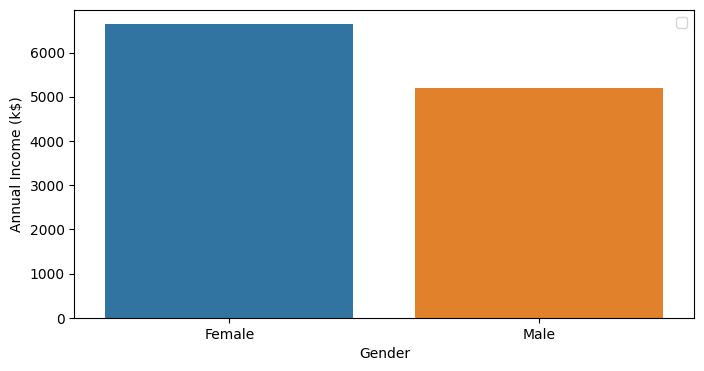

In [ ]:
bygender = data.groupby(by='Gender').agg({'Annual Income (k$)':'sum'}).reset_index()

fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data =bygender, x='Gender', y='Annual Income (k$)', ax=ax)
ax.set_title('')
ax.legend()
fig.show();

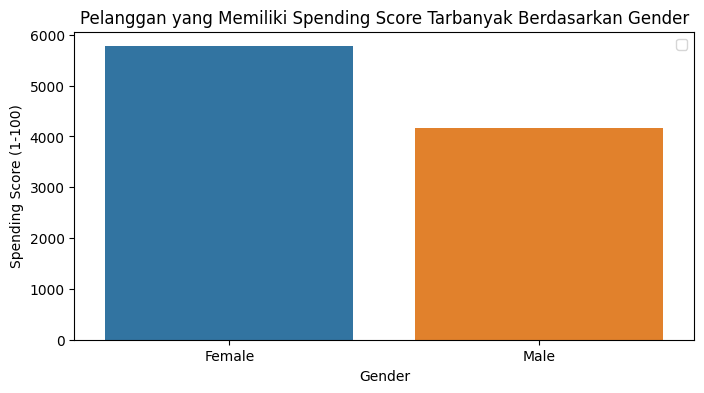

In [ ]:
bygender = data.groupby(by='Gender').agg({'Spending Score (1-100)':'sum'}).reset_index()
bygender.rename(columns={'CustomerID':'Customer_Count'}, inplace=True)


fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data =bygender, x='Gender', y='Spending Score (1-100)', ax=ax)
ax.set_title('Pelanggan yang Memiliki Spending Score Tarbanyak Berdasarkan Gender')
ax.legend()
fig.show();

# Split the Data

In [ ]:
x = data[['Annual Income (k$)','Spending Score (1-100)']]

# Build Model

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans()

In [ ]:
cluster = []
for i in range(1,10):
  km = KMeans(n_clusters=i, init= 'k-means++').fit(x)
  cluster.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

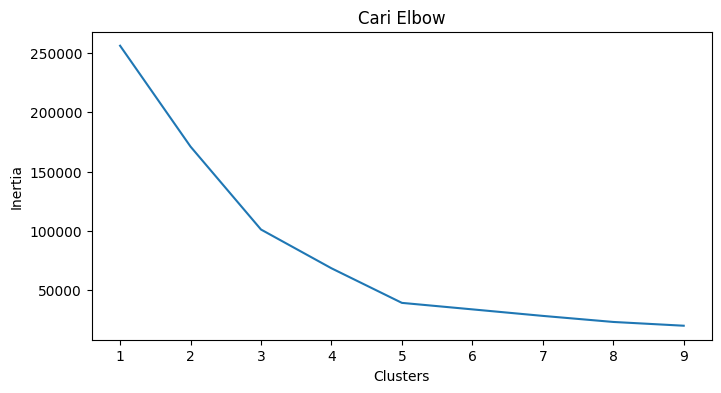

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 10)), y=cluster, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia');

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


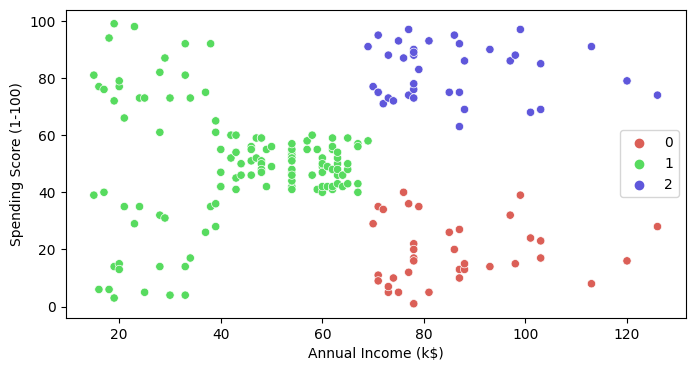

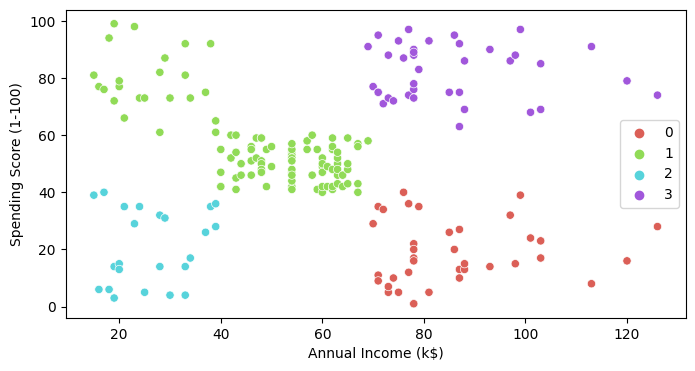

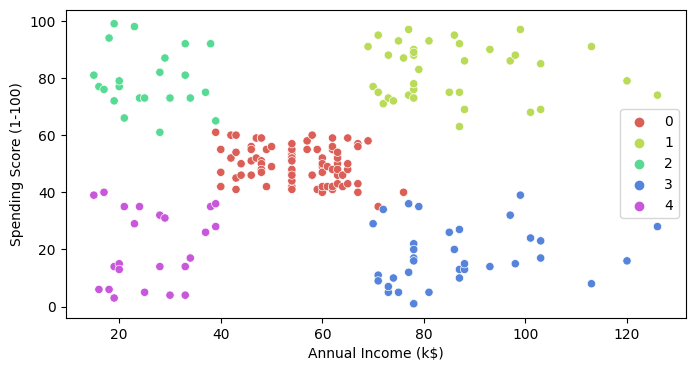

In [ ]:
for i in range(3,6):
  model = KMeans(n_clusters=i, init= 'k-means++').fit(x)

  plt.figure(figsize=(8, 4))
  sns.scatterplot(data =x, x=x['Annual Income (k$)'], y=x['Spending Score (1-100)'], hue=model.labels_,  palette=sns.color_palette('hls', i))
  plt.legend();

In [ ]:
model = KMeans(n_clusters=5).fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


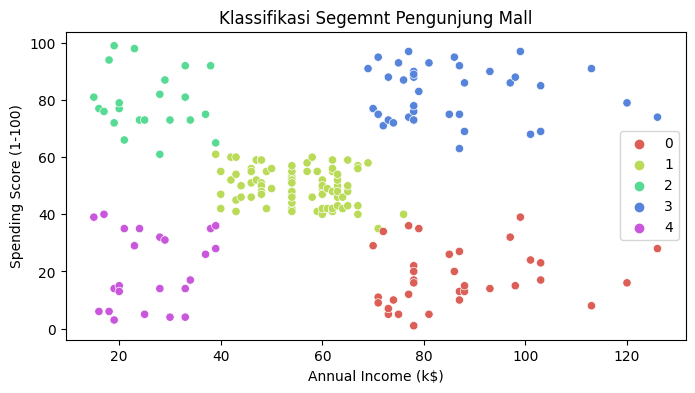

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.scatterplot(data =x, x=x['Annual Income (k$)'], y=x['Spending Score (1-100)'], hue=model.labels_,  palette=sns.color_palette('hls', 5))
ax.set_title('Klassifikasi Segemnt Pengunjung Mall')
ax.legend()
fig.show();